Reading and Merging the Data First:
 we load the shapefile using GeoPandas to obtain a GeoDataFrame representing state boundaries:

In [5]:
pip install geopandas geoplot matplotlib mapclassify numpy contextily folium imageio pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 68.3 MB/s eta 0:00:00


In [6]:
! wget https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip
!mkdir -p maps && unzip ../content/cb_2018_us_state_20m.zip -d maps

--2024-12-08 23:19:27--  https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip
Resolving www2.census.gov (www2.census.gov)... 23.201.189.54, 2600:1408:ec00:680::208c, 2600:1408:ec00:68b::208c
Connecting to www2.census.gov (www2.census.gov)|23.201.189.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘cb_2018_us_state_20m.zip’

cb_2018_us_state_20     [  <=>               ] 186.74K   837KB/s    in 0.2s    

2024-12-08 23:19:28 (837 KB/s) - ‘cb_2018_us_state_20m.zip’ saved [191218]

Archive:  ../content/cb_2018_us_state_20m.zip
  inflating: maps/cb_2018_us_state_20m.shp.ea.iso.xml  
  inflating: maps/cb_2018_us_state_20m.shp.iso.xml  
  inflating: maps/cb_2018_us_state_20m.shp  
  inflating: maps/cb_2018_us_state_20m.shx  
  inflating: maps/cb_2018_us_state_20m.dbf  
  inflating: maps/cb_2018_us_state_20m.prj  
 extracting: maps/cb_2018_us_state_20m.cpg  


In [7]:
! wget http://www2.census.gov/programs-surveys/popest/datasets/2010-2018/national/totals/nst-est2018-alldata.csv


URL transformed to HTTPS due to an HSTS policy
--2024-12-08 23:19:50--  https://www2.census.gov/programs-surveys/popest/datasets/2010-2018/national/totals/nst-est2018-alldata.csv
Resolving www2.census.gov (www2.census.gov)... 23.201.189.54, 2600:1408:c400:f88::208c, 2600:1408:c400:f91::208c
Connecting to www2.census.gov (www2.census.gov)|23.201.189.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘nst-est2018-alldata.csv’

nst-est2018-alldata     [ <=>                ]  64.94K  --.-KB/s    in 0.02s   

2024-12-08 23:19:50 (4.09 MB/s) - ‘nst-est2018-alldata.csv’ saved [66497]



In [8]:
# import necesssary libraries
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import contextily as ctx
import folium
import warnings
warnings.filterwarnings('ignore')

In [9]:
# read the data
usa_data = gpd.read_file("maps/cb_2018_us_state_20m.shp")
usa_data.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77926, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.7222, -75.75323 39.7579..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [10]:

state_pop = pd.read_csv("nst-est2018-alldata.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,...,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,...,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,-1.801582,-1.127222
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,...,-2.370672,-2.301663,-1.043009,-0.896575,0.042505,-0.715656,-1.357662,-1.226811,-0.519621,-0.431833
3,20,3,0,0,South Region,114555744,114563045,114867066,116039399,117271075,...,2.963135,2.779373,5.379667,5.836112,5.290067,6.206402,7.328494,7.225046,6.252425,6.148925
4,20,4,0,0,West Region,71945553,71946887,72103625,72787447,73489477,...,1.478565,1.350094,2.689358,3.226360,3.343874,4.148127,5.127995,5.372314,4.164981,3.965769


In [11]:
# merage the data
pop_states = usa_data.merge(state_pop, left_on="NAME", right_on="NAME")
pop_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",...,-3.991992,-4.063440,3.600733,3.315179,1.775836,1.160255,0.315784,-1.352135,-0.208652,-0.322019
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77926, -96.57794 42.827...",...,-1.278002,-0.916222,1.843768,-0.120479,2.359797,1.925327,0.702299,0.036461,0.573348,0.934001
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.7222, -75.75323 39.7579...",...,4.689728,7.127976,4.801565,4.910826,6.209397,6.493793,6.755571,5.516683,6.460703,9.019623
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",...,-0.698138,-1.040184,-1.999325,-1.820990,0.365060,-0.030544,-0.494039,-0.313424,0.968963,0.716636
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",...,-2.144836,-1.598828,1.516750,0.547598,-0.023724,-0.133225,-0.921843,-0.952470,0.302260,1.165270


Calculate the population change from 2010 to 2018 for each state

In [12]:
# Calculate the population change from 2010 to 2018 for each state
pop_states["POP_CHANGE_2010_2018"] = pop_states["POPESTIMATE2018"] - pop_states["POPESTIMATE2010"]
pop_states[["NAME", "POPESTIMATE2010", "POPESTIMATE2018", "POP_CHANGE_2010_2018"]].head()



,NAME,POPESTIMATE2010,POPESTIMATE2018,POP_CHANGE_2010_2018
0,Maryland,5788642,6042718,254076
1,Iowa,3050767,3156145,105378
2,Delaware,899595,967171,67576
3,Ohio,11539327,11689442,150115
4,Pennsylvania,12711158,12807060,95902


Plot a state from the data :
This graph is a geospatial visualization representing the state of New York, extracted from a dataset containing U.S. state geometries. Geospatial plots like this are commonly used to isolate and display geographic regions, providing a foundation for overlaying additional information. The distinct green color ensures clarity and emphasizes the selected area, making it suitable for focused analysis or presentation purposes.


<Axes: >

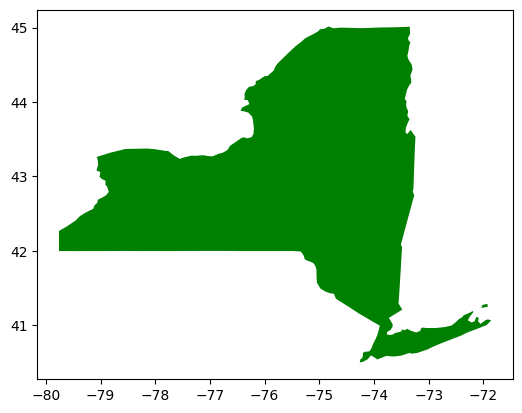

In [13]:
# plot state from the data
pop_states[pop_states.NAME=="New York"].plot(color='g')


In [23]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

<Axes: >

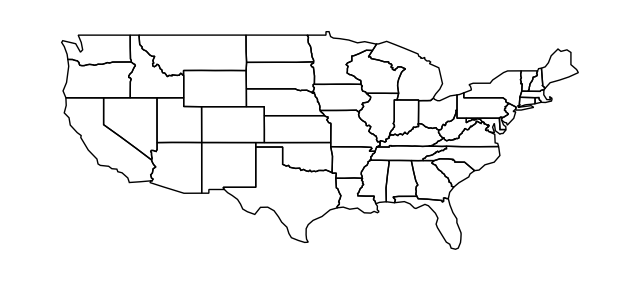

In [15]:
gplt.polyplot(contiguous_usa)

In [16]:
path = gplt.datasets.get_path("usa_cities")
usa_cities = gpd.read_file(path)

<Axes: >

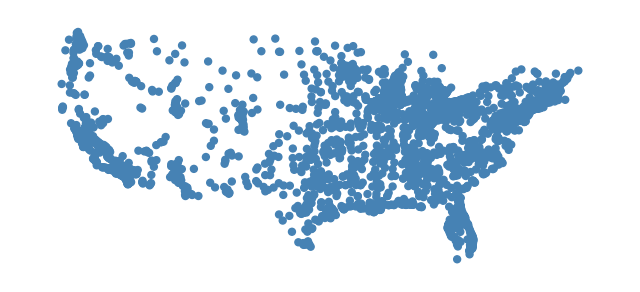

In [17]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities)

<Axes: >

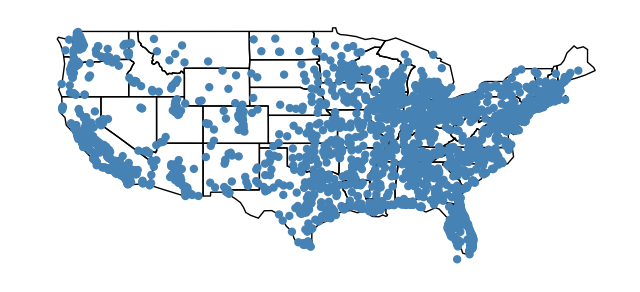

In [18]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

This graph is a choropleth map, a widely used geospatial visualization technique that represents data variations across a geographic region using color gradients. It provides an intuitive way to display spatial patterns, where darker shades signify higher values, making it easy to identify areas with greater population concentrations. The horizontal legend below ensures that viewers can interpret the scale of population estimates effectively

In the current analysis, this choropleth map visualizes U.S. state population estimates for 2018. The states with higher populations are depicted in darker red shades, clearly highlighting populous regions such as California and Texas. This visualization is useful for identifying demographic trends, supporting resource allocation decisions, and setting the stage for further analysis, such as population density or migration patterns.

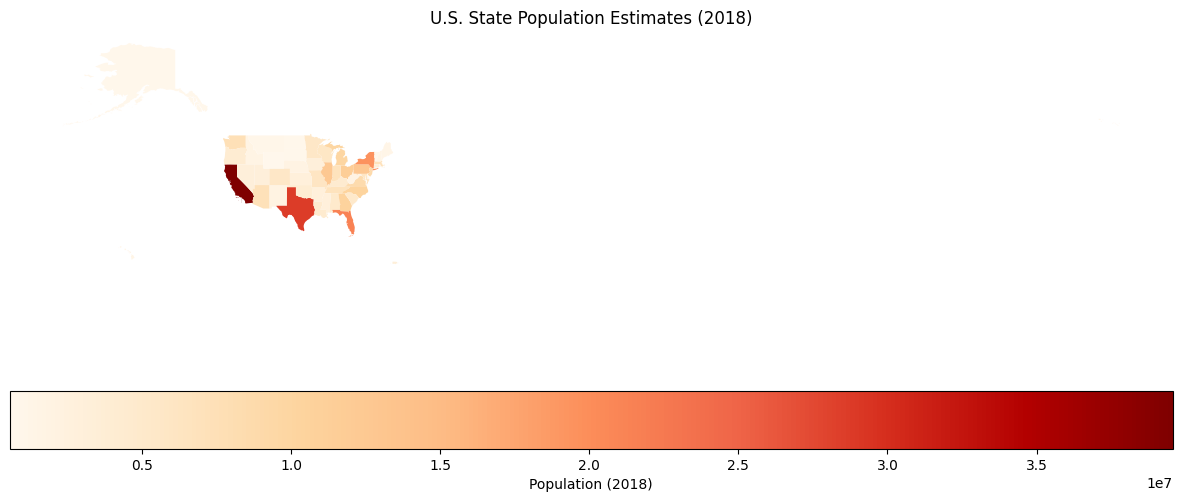

In [19]:
# Choropleth map to show 2018 population estimates
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
pop_states.plot(column="POPESTIMATE2018",
                cmap="OrRd",
                legend=True,
                legend_kwds={"label": "Population (2018)", "orientation": "horizontal"},
                ax=ax)
ax.set_title("U.S. State Population Estimates (2018)")
ax.axis("off")
plt.show()

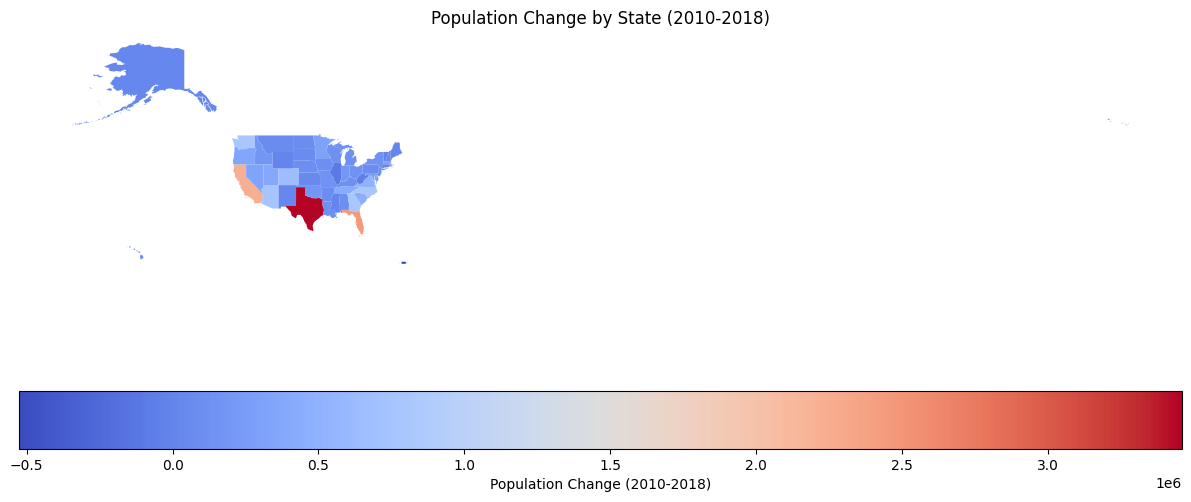

In [20]:
# Choropleth map to show population change from 2010 to 2018
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
pop_states["POP_CHANGE_2010_2018"] = pop_states["POPESTIMATE2018"] - pop_states["POPESTIMATE2010"]
pop_states.plot(column="POP_CHANGE_2010_2018",
                cmap="coolwarm",
                legend=True,
                legend_kwds={"label": "Population Change (2010-2018)", "orientation": "horizontal"},
                ax=ax)
ax.set_title("Population Change by State (2010-2018)")
ax.axis("off")
plt.show()


This graph is a proportional symbol map, a geospatial visualization technique where the size of symbols (in this case, circles) represents the magnitude of a particular variable—in this case, the 2018 population of U.S. states. The circles are positioned at the centroids of each state, making it easier to visually compare population sizes. This type of visualization is effective for highlighting disparities in magnitude across a spatial dataset, while maintaining the geographic context of the data.

In the current analysis, the proportional symbol map displays U.S. states with circle sizes proportional to their 2018 population. Larger circles indicate states with higher populations, such as California and Texas, while smaller circles represent states with smaller populations. This approach provides an intuitive and visually impactful way to compare population sizes across states, complementing other analyses, such as density or demographic trends. It also highlights regional patterns in population distribution at a glance.

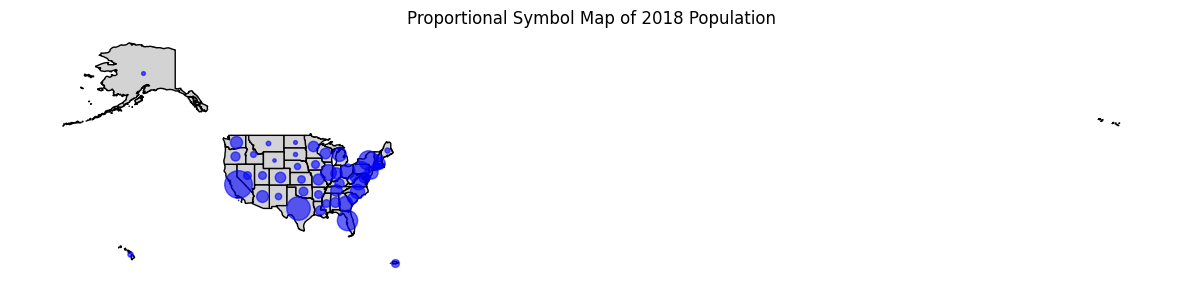

In [21]:
# Proportional symbol map to represent population size in 2018
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
pop_states["centroids"] = pop_states.geometry.centroid
pop_states.plot(ax=ax, color="lightgrey", edgecolor="black")
for _, row in pop_states.iterrows():
    ax.scatter(row["centroids"].x, row["centroids"].y,
               s=row["POPESTIMATE2018"] / 100000,
               color="blue", alpha=0.6)
ax.set_title("Proportional Symbol Map of 2018 Population")
ax.axis("off")
plt.show()


This graph is a dot density map, a geospatial visualization technique that uses points to represent occurrences or distributions of a variable—in this case, cities across the contiguous U.S. The map overlays red dots for city locations onto state boundaries, with the density of the dots indicating the spatial distribution of urban areas. Dot density maps are effective in showing concentrations and patterns, making them ideal for analyzing spatial relationships

In the current analysis, this dot density map highlights the geographic distribution of cities within the contiguous United States. Densely clustered areas, such as the East Coast, Midwest, and West Coast, reveal regions with higher urbanization, while sparsely dotted areas indicate regions with fewer cities. This visualization provides insights into regional urban development patterns and can serve as a basis for further studies on infrastructure, population density, or economic activity in these areas.

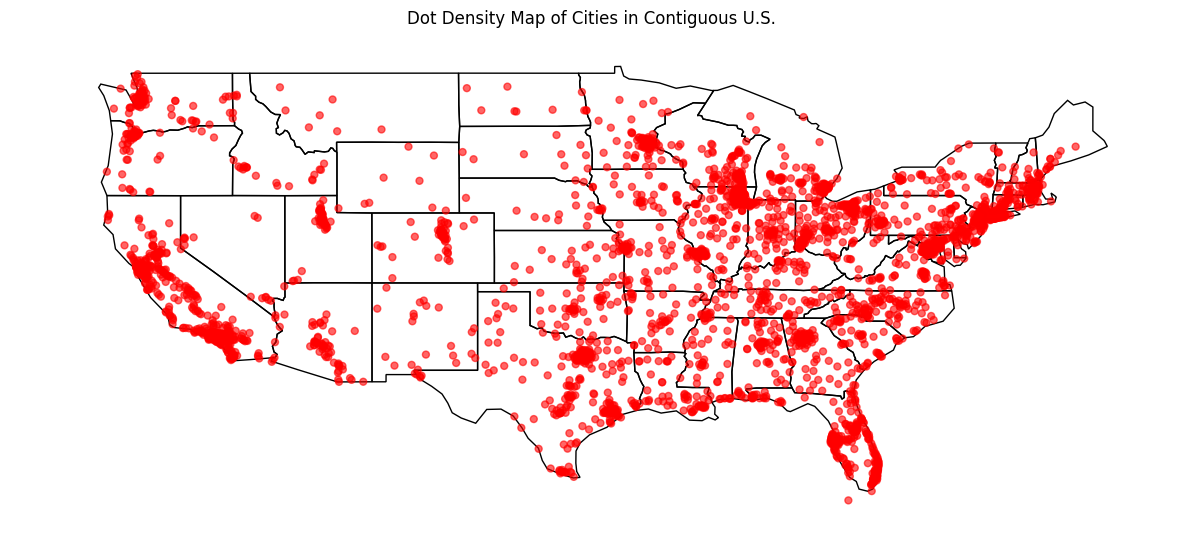

In [22]:
# Dot density map of cities over state boundaries
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gplt.polyplot(contiguous_usa, ax=ax, edgecolor="black", zorder=1)
gplt.pointplot(continental_usa_cities, ax=ax, color="red", alpha=0.6, zorder=2)
ax.set_title("Dot Density Map of Cities in Contiguous U.S.")
plt.show()


This graph is a Kernel Density Estimation (KDE) map, which represents the concentration or density of a variable—in this case, cities across the contiguous U.S.—using smoothed gradients. The KDE highlights areas of high density as darker shades of purple, providing an intuitive visualization of where cities are concentrated. This method is particularly effective in visualizing distributions while accounting for overlapping data points, offering insights into spatial patterns without the clutter of individual markers

In the current analysis, this KDE map highlights regions of high urban density, such as the East Coast, Midwest, and parts of California. The visualization reveals significant population centers and urban clusters, helping to identify geographic trends in urbanization and infrastructure. By smoothing the data, the KDE emphasizes regional density variations and provides a holistic view of population distribution patterns across the contiguous United States.

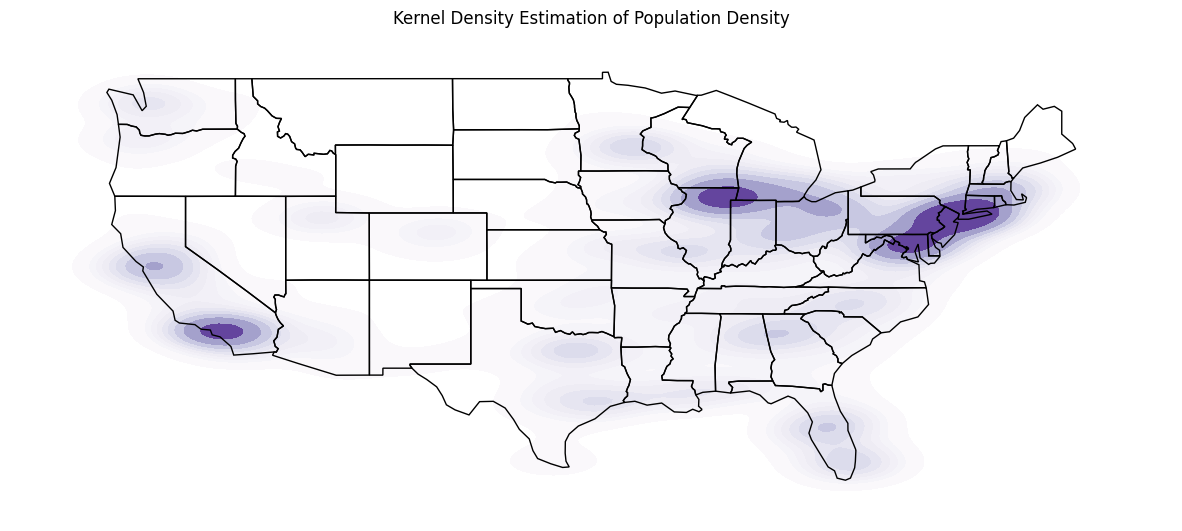

In [ ]:
# Kernel density estimation for population density
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gplt.kdeplot(
    continental_usa_cities,
    ax=ax,
    cmap="Purples",
    shade=True,
    bw_adjust=0.5
)
gplt.polyplot(contiguous_usa, ax=ax, edgecolor="black", zorder=1)
ax.set_title("Kernel Density Estimation of Population Density")
plt.show()


This graph represents a choropleth map overlaid on a terrain basemap, combining geospatial data with a geographic context. The choropleth map uses a color gradient to display population estimates for U.S. states in 2018, with darker shades representing higher populations. Overlaying this data on a terrain basemap enhances the visualization by providing geographical landmarks and spatial orientation, making it easier for viewers to connect the data to physical features

In the current analysis, this visualization highlights the population distribution across U.S. states while grounding the data in a realistic map context. By integrating population data with the OpenStreetMap terrain background, the map provides a comprehensive view that can assist in understanding how population patterns relate to geographic features. It is particularly useful for stakeholders or audiences who require both demographic and geographic insights for decision-making or further analysis

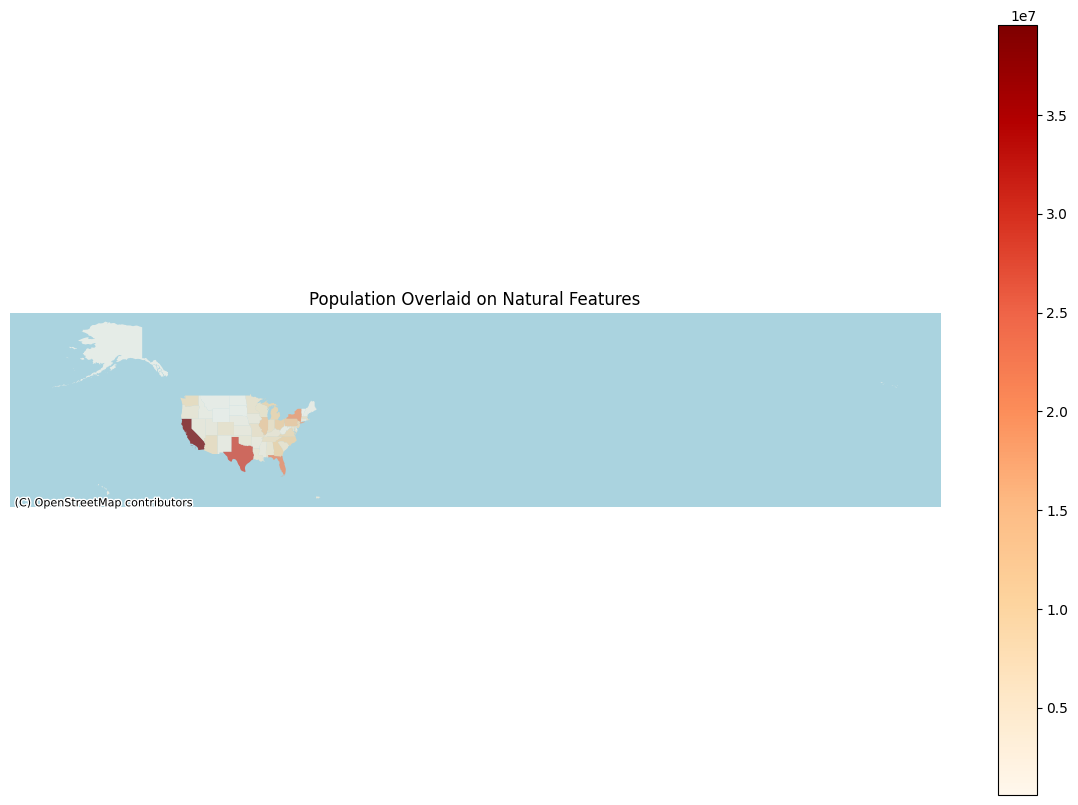

In [ ]:
# Overlaying population data on a terrain basemap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
pop_states.plot(ax=ax, column="POPESTIMATE2018", cmap="OrRd", alpha=0.7, legend=True)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Population Overlaid on Natural Features")
ax.axis("off")
plt.show()

This graph combines state boundaries with a point plot of major city locations, visualizing the relationship between urban centers and geographic areas. The points are colored using a gradient based on elevation (measured in feet), with the legend indicating elevation values. This type of visualization is particularly useful for exploring the spatial distribution of cities while incorporating an additional variable (elevation), providing multi-dimensional insights.

In the current analysis, this visualization highlights the distribution of major cities across the contiguous U.S., with variations in elevation represented by the color gradient. Urban centers at higher elevations, such as cities in the Rocky Mountain region, are distinctly marked with brighter colors, while lower elevation cities, such as those on the coasts or the central plains, appear darker. This visualization offers insights into geographic patterns, helping to understand how elevation might influence urban development, population density, or infrastructure planning.

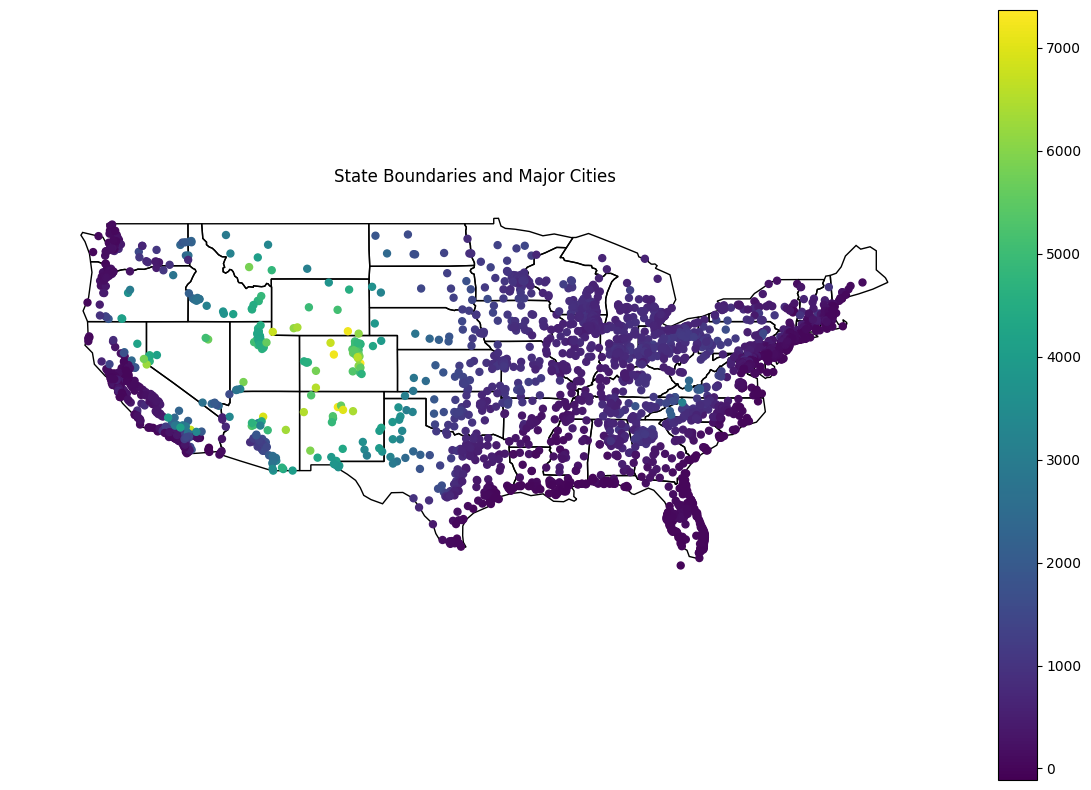

In [ ]:
# Combine state boundaries with major city locations
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gplt.polyplot(contiguous_usa, ax=ax, edgecolor="black", zorder=1)
gplt.pointplot(continental_usa_cities, ax=ax, hue="ELEV_IN_FT", legend=True, zorder=2)
ax.set_title("State Boundaries and Major Cities")
plt.show()


In [24]:
# Interactive map with Folium showing population estimates

m = folium.Map(location=[37.8, -96], zoom_start=4)
for _, row in pop_states.iterrows():
    folium.CircleMarker(
        location=[row["geometry"].centroid.y, row["geometry"].centroid.x],
        radius=row["POPESTIMATE2018"] / 1e6,
        color="blue",
        fill=True,
        fill_opacity=0.6,
        tooltip=f"{row['NAME']}: {row['POPESTIMATE2018']}"
    ).add_to(m)
m.save("interactive_population_map.html")
